## 실습 #3 - used-cars-price-prediction

### 3.0 데이터 확인 & Unnamed column 삭제

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
# 데이터 불러오기
rawData = pd.read_csv('used_car_train-data.csv')
data = rawData.copy()
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
# 데이터에 고유한 값들의 수를 출력
data.nunique()

Unnamed: 0           6019
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [32]:
# Unnamed column 삭제
data.drop(['Unnamed: 0'], axis=1, inplace=True) # inplace 적용시켜 없애기
data.info()  # .info() 결과 Dtype이 다 다르다. NA가 존재. -> 결측치, 이상치, Dtype 통일.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


### 모델1 :'Year'를 독립변수로 사용하여 학습

In [33]:

X = data[['Year']]
Y = data['Price']
X, Y

# Train Data와 Test Data 분리
# random_state는 숫자가 다른 독립변수에서 동일하게 test 데이터를 뽑아내기 위해서 사용!
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3, random_state=25)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(4213, 1) (1806, 1) (4213,) (1806,)


In [34]:

# Linear Regression 알고리즘 적용 / 학습
algo = LinearRegression()
model1 = algo.fit(trainX, trainY)

In [35]:
#  W와 B확인, 모델 평가
pred1 = model1.predict(testX)
print(model1.coef_, model1.intercept_, model1.score(testX,testY))
print('MSE:', mean_squared_error(testY, pred1))
print('RMSE:', np.sqrt(mean_squared_error(testY, pred1)))


[1.06360178] -2131.9102977147522 0.09334214470044155
MSE: 106.84798673891356
RMSE: 10.336729982877252


### 모델 2: 'Kilometers_Driven'를 독립변수로 추가하여 학습

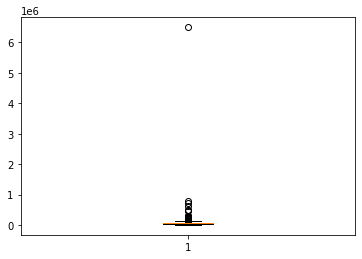

In [36]:
# - Boxplot 으로 이상치 확인

plt.boxplot(data['Kilometers_Driven'])
plt.show()      # 이상치 존재

In [37]:
# ['Kilometers_Driven']의 이상치 제거
print(data['Kilometers_Driven'].describe())
Q1 =(np.percentile(data['Kilometers_Driven'].values, 25))
Q3 =(np.percentile(data['Kilometers_Driven'].values, 75))
IQR = Q3 - Q1
lower = Q1 - (IQR*1.5)  # 최소 양수라서 0으로 줘도 된다.
upper = Q3 + (IQR*1.5)
print(lower, upper)

data = data[(data['Kilometers_Driven'] >= lower ) & (data['Kilometers_Driven'] <= upper)]

count    6.019000e+03
mean     5.873838e+04
std      9.126884e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.300000e+04
75%      7.300000e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64
-24500.0 131500.0


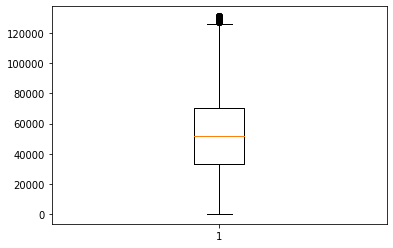

In [38]:
plt.boxplot(data['Kilometers_Driven'])
plt.show()

In [46]:
# ['Kilometers_Driven']를 포함해서 model2로 만들고 다시 학습
X = data[['Year', 'Kilometers_Driven']] # 독립변수
Y = data['Price']                       # 종속변수

# test data 나누기
trainX, testX, trainY, testY = train_test_split(X,Y,test_size=0.3, random_state=25)

# 모델 생성 및 학습
algo = LinearRegression()
model2 = algo.fit(trainX,trainY)
pred2 = model2.predict(testX)

print(model2.coef_, model2.intercept_, model2.score(testX,testY))
print('MSE: ', mean_squared_error(testY, pred2))
print('RMSE: ', np.sqrt(mean_squared_error(testY, pred2)))

[ 9.33851849e-01 -1.91813604e-05] -1869.6569081435282 0.1029765878175769
MSE:  119.7974511679015
RMSE:  10.945202198584616


### 모델 3: 'Transmission'를 독립변수로 추가하여 학습

In [40]:

# - 학습을 위해 feature는 수치화 되어야 함, 원-핫 인코딩
data = pd.get_dummies(data=data, columns=['Transmission'])
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Automatic,Transmission_Manual
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,0,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,0,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,0,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1,0


In [47]:
# 모델 3 학습 및 결과 확인
X = data[['Year', 'Kilometers_Driven', 'Transmission_Automatic', 'Transmission_Manual']]
Y = data['Price']

trainX, testX, trainY, testY = train_test_split(X,Y, test_size=0.3, random_state=25)
model3 = LinearRegression().fit(trainX,trainY)
pred3 = model3.predict(testX)
print(model3.coef_, model3.intercept_, model3.score(testX,testY))
print('MSE: ', mean_squared_error(testY, pred3))
print('RMSE: ', np.sqrt(mean_squared_error(testY, pred3)))


[ 8.21165182e-01 -4.63208758e-06  7.01709316e+00 -7.01709316e+00] -1640.6340499515247 0.4053425550004679
MSE:  79.41648485588591
RMSE:  8.911592722734019


### 모델 4: 'Price' 이상치 삭제

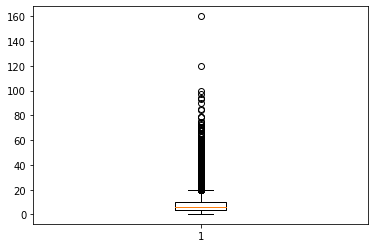

In [50]:

plt.boxplot(data['Price'])
plt.show()

In [48]:
mean = data['Price'].mean()
std = data['Price'].std()
lower = mean - (3*std)  # 표준편차 * 3
upper = mean + (3*std)
print(lower, upper)

-24.322291618447778 43.52514188490815


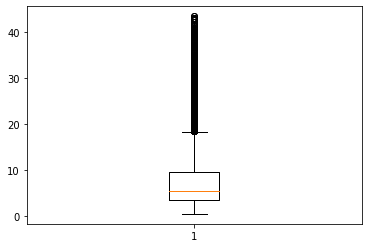

In [53]:
data = data[(data['Price'] >= lower) & (data['Price'] <= upper)]
plt.boxplot(data['Price'])
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5671 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    5671 non-null   object 
 1   Location                5671 non-null   object 
 2   Year                    5671 non-null   int64  
 3   Kilometers_Driven       5671 non-null   int64  
 4   Fuel_Type               5671 non-null   object 
 5   Owner_Type              5671 non-null   object 
 6   Mileage                 5669 non-null   object 
 7   Engine                  5636 non-null   object 
 8   Power                   5636 non-null   object 
 9   Seats                   5630 non-null   float64
 10  New_Price               771 non-null    object 
 11  Price                   5671 non-null   float64
 12  Transmission_Automatic  5671 non-null   uint8  
 13  Transmission_Manual     5671 non-null   uint8  
dtypes: float64(2), int64(2), object(8), uint

In [55]:
# 모델 4 학습 및 결과 확인
X = data[['Year', 'Kilometers_Driven', 'Transmission_Automatic', 'Transmission_Manual']]
Y = data['Price']

trainX, testX, trainY, testY = train_test_split(X,Y, test_size=0.3, random_state=25)
model4 = LinearRegression().fit(trainX,trainY)
pred4 = model4.predict(testX)
print(model4.coef_, model4.intercept_, model4.score(testX,testY))
print('MSE: ', mean_squared_error(testY, pred4))
print('RMSE: ', np.sqrt(mean_squared_error(testY, pred4)))


[ 7.61893631e-01  1.72916325e-05  5.43900153e+00 -5.43900153e+00] -1524.0772980904505 0.4507640515077933
MSE:  33.66966978758815
RMSE:  5.802557176589314


### 모델 5: 'Fuel_type' 독립변수 추가